In [67]:
# # a=1;
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint
# import math,copy,random
# import sys
%matplotlib inline

execfile('rep_util.py')
# cmd_init_all
# %matplotlib inline
# plt.figure()
%matplotlib inline


In [68]:
def sdot1(s,t,param):

#     (p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)=s
#     (k_m, k_m0, k_p, k_dm, k_dp, K, n, k_dGFP, IPTG,fix_conc)=param
    exec(cmd_unpack_all)

#     if not fix_list==None:
#     print(fix_list)
    
#     for var_ind in fix_list:
#         cmd=varname[var_ind] + ' = (fix_conc[var_ind])';
#         exec(cmd);
#         print(cmd)
#         print(var_ind)
        

    rate_m_LacI_prod = (k_m*K**n / (K**n + p_CI**n)  + 
#                         k_m*K**n / (K**n + p_LacI**n)
                        + k_m0)
    if IPTG_method == None:
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) + k_m0
    if IPTG_method == 'multiply':
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) * K**n/(K**n + IPTG) + k_m0
    if IPTG_method == 'add':
        rate_m_TetR_prod = k_m*K**n / (K**n + (p_LacI + IPTG)**n) + k_m0
    
    rate_m_CI_prod   = (k_m*K**n / (K**n + p_TetR**n) + 
                        k_m*K**n / (K**n + p_CI**n)
                        +k_m0)
    rate_m_GFP_prod  = 0

    rate_p_LacI_prod = k_p*m_LacI
    rate_p_TetR_prod = k_p*m_TetR
    rate_p_CI_prod   = k_p*m_CI
    rate_p_GFP_prod  = 0

    rate_m_LacI_loss = k_dm*m_LacI
    rate_m_TetR_loss = k_dm*m_TetR
    rate_m_CI_loss   = k_dm*m_CI
    rate_m_GFP_loss  = 0

    rate_p_LacI_loss = k_dp*p_LacI
    rate_p_TetR_loss = k_dp*p_TetR
    rate_p_CI_loss   = k_dp*p_CI
    rate_p_GFP_loss  = 0

    dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
    dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
    dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
    dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


    dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
    dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
    dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
    dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss

    exec(cmd_pack_all)
    return sdot

In [ ]:
### First, we 

## We incorporate a self inhibition into LacI. That is, to implement a tra 

### First, we 

## We incorporate a self inhibition into LacI. That is, to implement a tra 

def sdot1A(s,t,param):

#     (p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)=s
#     (k_m, k_m0, k_p, k_dm, k_dp, K, n, k_dGFP, IPTG,fix_conc)=param
    exec(cmd_unpack_all)

#     if not fix_list==None:
#     print(fix_list)
    
#     for var_ind in fix_list:
#         cmd=varname[var_ind] + ' = (fix_conc[var_ind])';
#         exec(cmd);
#         print(cmd)
#         print(var_ind)
        

    rate_m_LacI_prod = (k_m*K**n / (K**n + p_CI**n)  + 
#                         k_m*K**n / (K**n + p_LacI**n)
                        + k_m0)
    if IPTG_method == None:
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) + k_m0
    if IPTG_method == 'multiply':
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) * K**n/(K**n + IPTG) + k_m0
    if IPTG_method == 'add':
        rate_m_TetR_prod = k_m*K**n / (K**n + (p_LacI + IPTG)**n) + k_m0
    
    rate_m_CI_prod   = (k_m*K**n / (K**n + p_TetR**n) + 
                        0.5*k_m*K**n / (K**n + p_CI**n)
                        +k_m0)
    rate_m_GFP_prod  = 0

    rate_p_LacI_prod = k_p*m_LacI
    rate_p_TetR_prod = k_p*m_TetR
    rate_p_CI_prod   = k_p*m_CI
    rate_p_GFP_prod  = 0

    rate_m_LacI_loss = k_dm*m_LacI
    rate_m_TetR_loss = k_dm*m_TetR
    rate_m_CI_loss   = k_dm*m_CI
    rate_m_GFP_loss  = 0

    rate_p_LacI_loss = k_dp*p_LacI
    rate_p_TetR_loss = k_dp*p_TetR
    rate_p_CI_loss   = k_dp*p_CI
    rate_p_GFP_loss  = 0

    dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
    dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
    dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
    dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


    dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
    dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
    dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
    dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss

    exec(cmd_pack_all)
    return sdot


In [70]:
### First, we 

## We incorporate a self inhibition into LacI. That is, to implement a tra 

def sdot2(s,t,param):

#     (p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)=s
#     (k_m, k_m0, k_p, k_dm, k_dp, K, n, k_dGFP, IPTG,fix_conc)=param
    exec(cmd_unpack_all)

#     if not fix_list==None:
#     print(fix_list)
    
#     for var_ind in fix_list:
#         cmd=varname[var_ind] + ' = (fix_conc[var_ind])';
#         exec(cmd);
#         print(cmd)
#         print(var_ind)
        

    rate_m_LacI_prod = (k_m*K**n / (K**n + p_CI**n)  + 
                        k_m*K**n / (K**n + p_LacI**n)
                        + k_m0)
    if IPTG_method == None:
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) + k_m0
    if IPTG_method == 'multiply':
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) * K**n/(K**n + IPTG) + k_m0
    if IPTG_method == 'add':
        rate_m_TetR_prod = k_m*K**n / (K**n + (p_LacI + IPTG)**n) + k_m0

    rate_m_TetR_prod +=  k_m*K**n / (K**n + p_TetR**n)
    
    rate_m_CI_prod   = (k_m*K**n / (K**n + p_TetR**n) + 
                        k_m*K**n / (K**n + p_CI**n)
                        +k_m0)
    rate_m_GFP_prod  = 0

    rate_p_LacI_prod = k_p*m_LacI
    rate_p_TetR_prod = k_p*m_TetR
    rate_p_CI_prod   = k_p*m_CI
    rate_p_GFP_prod  = 0

    rate_m_LacI_loss = k_dm*m_LacI
    rate_m_TetR_loss = k_dm*m_TetR
    rate_m_CI_loss   = k_dm*m_CI
    rate_m_GFP_loss  = 0

    rate_p_LacI_loss = k_dp*p_LacI
    rate_p_TetR_loss = k_dp*p_TetR
    rate_p_CI_loss   = k_dp*p_CI
    rate_p_GFP_loss  = 0

    dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
    dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
    dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
    dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


    dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
    dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
    dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
    dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss

    exec(cmd_pack_all)
    return sdot


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:46: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


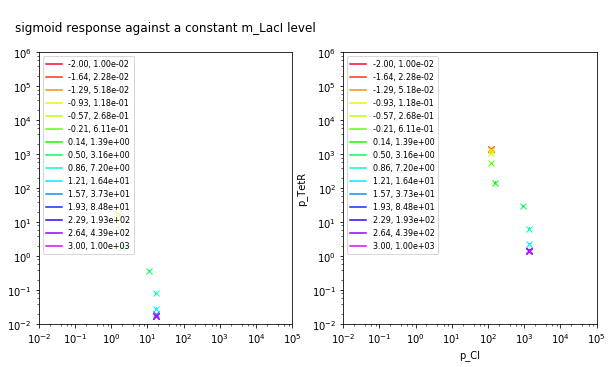

In [72]:
# sigmoid response against a constant m_LacI level
# sigmoid response against a constant m_LacI level
# %matplotlib notebook
tl='''
sigmoid response against a constant m_LacI level
'''
cmd_par_override='m_LacI = 10**(log_par)';


print(cmd_par_override)
fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
exec(cmd_name2dict)
parname = 'm_LacI'
varname.pop(vardict[parname])
cstname.append(parname)
exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)



lc_step = 10000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;

# k_dp=0.0014
for i,log_par in enumerate(np.linspace(-2.,3.,siz)):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
    exec(cmd_par_override)
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot1,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    

    xs=m_CI_obs;ys=m_TetR_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

In [ ]:
# sigmoid response against a constant m_LacI level
# sigmoid response against a constant m_LacI level
# %matplotlib notebook
tl='''
sigmoid response against a constant m_LacI level
'''
cmd_par_override = '    m_LacI = 10**(log_par)';
print(cmd_par_override)

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
exec(cmd_name2dict)
parname = 'm_LacI'
varname.pop(vardict[parname])
cstname.append(parname)
exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)



lc_step = 10000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;

# k_dp=0.0014
for i,log_par in enumerate(np.linspace(-2.,6.,siz)):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
    exec(cmd_par_override)
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot2,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    

#     xs=p_CI_obs;ys=p_LacI_obs;
    xs = m_CI_obs;    ys = m_TetR_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

In [ ]:
print(cmd_default_param)

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:35: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


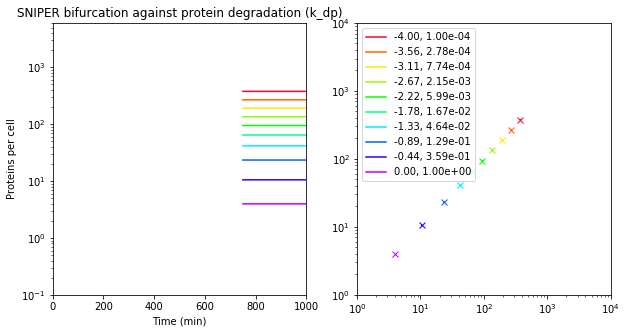

In [73]:
### SNIPER bifurcation against protein degradation (k_dp)
tl='SNIPER bifurcation against protein degradation (k_dp)';
cmd_par_override='k_dp=10**(log_par)'
print(cmd_par_override)
fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')

IPTG=0;
exec(cmd_init_name)
# var_ind=vardict['p_LacI'];
# varname.pop(var_ind);
# cstname.append('p_LacI');
exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)
lc_step = 15000;



siz=10;


for i,log_par in enumerate(np.linspace(-4.,-0,siz)):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    exec(cmd_default_param)
    exec(cmd_default_incond)
    exec(cmd_par_override);
    exec(cmd_init_all)
    
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot2,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    


    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
#     axL.plot(t_obs/60,p_TetR_obs,'orange', label = 'TetR')
#     axL.plot(t_obs/60,p_CI_obs,'b', label = 'lambda_CI')
    #     axL.legend()

    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
    
axL.set_xlim(1E-1,1000)
axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:45: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


log_par = -6.0, period estimate: 0.000000, amplitude:0.000000
log_par = -5.35714285714, period estimate: 10000.000000, amplitude:3932.425285
log_par = -4.71428571429, period estimate: 10000.000000, amplitude:3899.033899
log_par = -4.07142857143, period estimate: 10000.000000, amplitude:3752.527242
log_par = -3.42857142857, period estimate: 10000.000000, amplitude:3127.475572
log_par = -2.78571428571, period estimate: 5000.000000, amplitude:1273.596512
log_par = -2.14285714286, period estimate: 0.000000, amplitude:0.000034
log_par = -1.5, period estimate: 0.000000, amplitude:0.000000
log_par = -0.857142857143, period estimate: 0.000000, amplitude:0.000000
log_par = -0.214285714286, period estimate: 0.000000, amplitude:0.000000
log_par = 0.428571428571, period estimate: 0.000000, amplitude:0.000000
log_par = 1.07142857143, period estimate: 0.000000, amplitude:0.000000
log_par = 1.71428571429, period estimate: 0.000000, amplitude:0.000000
log_par = 2.35714285714, period estimate: 0.000000

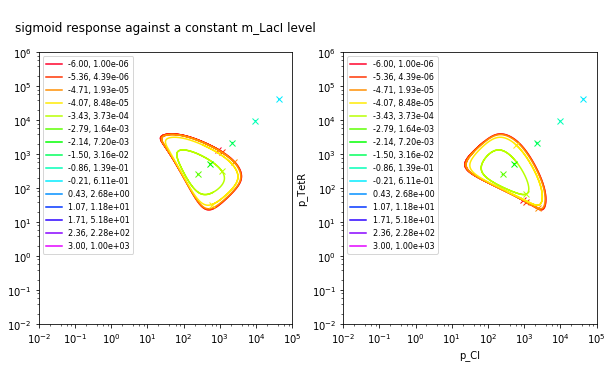

In [74]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
sigmoid response against a constant m_LacI level
'''
cmd_par_override='k_m0 = 10**(log_par)'
print(cmd_par_override)
fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
# cstname.append(parname)
exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)



lc_step = 10000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;

# k_dp=0.0014
for i,log_par in enumerate(np.linspace(-6.,3.,siz)):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
    exec(cmd_par_override)
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    
    period = fft_period(ys,debug=0)
    amp=ys.max()-ys.min()
    print('log_par = {}, period estimate: {:f}, amplitude:{:f}'.format(str(log_par),period,amp))



    xs=p_CI_obs;ys=p_LacI_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:48: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


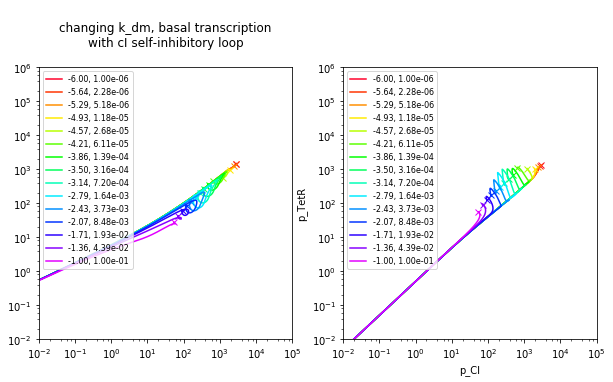

In [76]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
changing k_dm, basal transcription
with cI self-inhibitory loop
'''

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
# cstname.append(parname)
exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)


t_max=1000.*60.

# lc_step = 10000;
lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;

# k_dp=0.0014
for i,log_par in enumerate(np.linspace(-6,-1.,siz)):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
    k_dm = 10**(log_par)
#     n = log_par
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot1,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    

    xs=m_CI_obs;ys=m_TetR_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:48: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


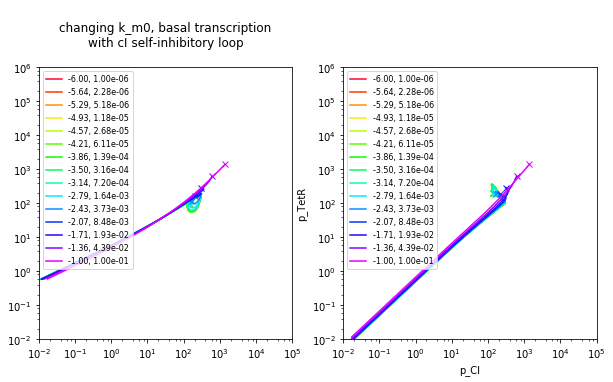

In [77]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
changing k_m0, basal transcription
with cI self-inhibitory loop
'''

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
# cstname.append(parname)
exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)


t_max=1000.*60.

# lc_step = 10000;
lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;

# k_dp=0.0014
for i,log_par in enumerate(np.linspace(-6,-1.,siz)):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
    k_m0 = 10**(log_par)
#     n = log_par
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot1,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    

    xs=p_CI_obs;ys=p_LacI_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:48: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


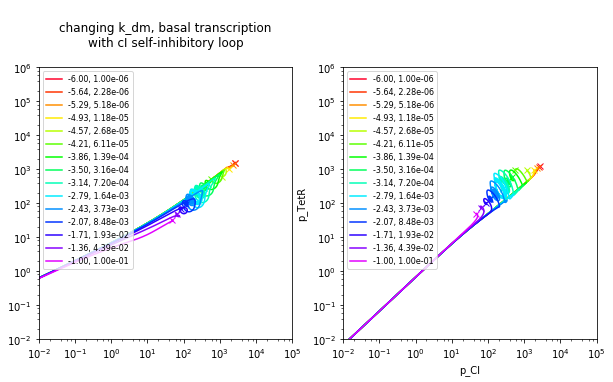

In [78]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
changing k_dm, basal transcription
with cI self-inhibitory loop
'''

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
# cstname.append(parname)
exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)


t_max=1000.*60.

# lc_step = 10000;
lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;

# k_dp=0.0014
for i,log_par in enumerate(np.linspace(-6,-1.,siz)):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
    k_dm = 10**(log_par)
#     n = log_par
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot1A,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    

    xs=p_CI_obs;ys=p_LacI_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

In [79]:
### First, we 

## We incorporate a self inhibition into LacI. That is, to implement a tra 

def sdot3(s,t,param):

#     (p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)=s
#     (k_m, k_m0, k_p, k_dm, k_dp, K, n, k_dGFP, IPTG,fix_conc)=param
    exec(cmd_unpack_all)

#     if not fix_list==None:
#     print(fix_list)
    
#     for var_ind in fix_list:
#         cmd=varname[var_ind] + ' = (fix_conc[var_ind])';
#         exec(cmd);
#         print(cmd)
#         print(var_ind)
        

    rate_m_LacI_prod = (k_m*K**n / (K**n + p_CI**n)  + 
                        k_m*K**n*p_TetR**n / (K**n + p_TetR**n)
                        + k_m0)
    if IPTG_method == None:
        rate_m_TetR_prod = (k_m0+
                            k_m*K**n / (K**n + p_LacI**n)+
                            k_m*K**n*p_CI**n / (K**n + p_CI**n))
    if IPTG_method == 'multiply':
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) * K**n/(K**n + IPTG) + k_m0
    if IPTG_method == 'add':
        rate_m_TetR_prod = k_m*K**n / (K**n + (p_LacI + IPTG)**n) + k_m0
    
    rate_m_CI_prod   = (k_m*K**n / (K**n + p_TetR**n) + 
#                         k_m*K**n*p_CI**n/ (K**n + p_CI**n)
                        k_m*K**n*p_LacI**n / (K**n + p_LacI**n)
                        
                        +k_m0)
    
    rate_m_GFP_prod  = 0

    rate_p_LacI_prod = k_p*m_LacI
    rate_p_TetR_prod = k_p*m_TetR
    rate_p_CI_prod   = k_p*m_CI
    rate_p_GFP_prod  = 0

    rate_m_LacI_loss = k_dm*m_LacI
    rate_m_TetR_loss = k_dm*m_TetR
    rate_m_CI_loss   = k_dm*m_CI
    rate_m_GFP_loss  = 0

    rate_p_LacI_loss = k_dp*p_LacI
    rate_p_TetR_loss = k_dp*p_TetR
    rate_p_CI_loss   = k_dp*p_CI
    rate_p_GFP_loss  = 0

    dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
    dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
    dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
    dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


    dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
    dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
    dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
    dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss

    exec(cmd_pack_all)
    return sdot
### First, we 

## We incorporate a self inhibition into LacI. That is, to implement a tra 

In [80]:
def sdot4(s,t,param):

#     (p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)=s
#     (k_m, k_m0, k_p, k_dm, k_dp, K, n, k_dGFP, IPTG,fix_conc)=param
    exec(cmd_unpack_all)

#     if not fix_list==None:
#     print(fix_list)
    
#     for var_ind in fix_list:
#         cmd=varname[var_ind] + ' = (fix_conc[var_ind])';
#         exec(cmd);
#         print(cmd)
#         print(var_ind)
        

    rate_m_LacI_prod = (k_m*K**n / (K**n + p_Hypo**n)  + 
#                         k_m*K**n / (K**n + p_LacI**n)
                        + k_m0)
    if IPTG_method == None:
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) + k_m0
    if IPTG_method == 'multiply':
        rate_m_TetR_prod = k_m*K**n / (K**n + p_LacI**n) * K**n/(K**n + IPTG) + k_m0
    if IPTG_method == 'add':
        rate_m_TetR_prod = k_m*K**n / (K**n + (p_LacI + IPTG)**n) + k_m0
    
    rate_m_CI_prod   = (k_m*K**n / (K**n + p_TetR**n) + 
                        +k_m0)
    rate_m_Hypo_prod = (k_m*K**n / (K**n + p_CI**n) + 
                        +k_m0)
    rate_m_GFP_prod  = 0

    rate_p_LacI_prod = k_p*m_LacI
    rate_p_TetR_prod = k_p*m_TetR
    rate_p_CI_prod   = k_p*m_CI
    rate_p_GFP_prod  = 0
    rate_p_Hypo_prod   = k_p*m_Hypo
    

    rate_m_LacI_loss = k_dm*m_LacI
    rate_m_TetR_loss = k_dm*m_TetR
    rate_m_CI_loss   = k_dm*m_CI
    rate_m_GFP_loss  = 0
    rate_m_Hypo_loss   = k_dm*m_Hypo
    

    rate_p_LacI_loss = k_dp*p_LacI
    rate_p_TetR_loss = k_dp*p_TetR
    rate_p_CI_loss   = k_dp*p_CI
    rate_p_GFP_loss  = 0
    rate_p_Hypo_loss   = k_dp*m_Hypo
    

    dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
    dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
    dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
    dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss
    dp_Hypo  = rate_p_Hypo_prod  - rate_p_Hypo_loss
    


    dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
    dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
    dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
    dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss
    dm_Hypo  = rate_m_Hypo_prod   - rate_m_Hypo_loss

    exec(cmd_pack_all)
    return sdot

In [81]:
### First, we 

## We incorporate a self inhibition into LacI. That is, to implement a tra 

def sdot_mtpl(s,t,param):

#     (p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)=s
#     (k_m, k_m0, k_p, k_dm, k_dp, K, n, k_dGFP, IPTG,fix_conc)=param
    exec(cmd_unpack_all)

#     if not fix_list==None:
#     print(fix_list)
    
#     for var_ind in fix_list:
#         cmd=varname[var_ind] + ' = (fix_conc[var_ind])';
#         exec(cmd);
#         print(cmd)
#         print(var_ind)
        

    rate_m_CIO_prod = (k_m*K**n / (K**n + p_CI**n)  + 
#                         k_m*K**n / (K**n + p_LacI**n)
                        + k_m0)
    if IPTG_method == None:
        rate_m_LacO_prod = k_m*K**n / (K**n + p_LacI**n) + k_m0
    if IPTG_method == 'multiply':
        rate_m_LacO_prod = k_m*K**n / (K**n + p_LacI**n) * K**n/(K**n + IPTG) + k_m0
    if IPTG_method == 'add':
        rate_m_LacO_prod = k_m*K**n / (K**n + (p_LacI + IPTG)**n) + k_m0
    
    rate_m_TetO_prod   = (k_m*K**n / (K**n + p_TetR**n) + 
                        +k_m0)
    rate_m_GFP_prod  = 0

    rate_m_LacI_prod = pnum[0][0] * rate_m_CIO_prod + pnum[0][1] * rate_m_LacO_prod;
    rate_m_TetR_prod = pnum[1][0] * rate_m_LacO_prod + pnum[1][1] * rate_m_TetO_prod;
    rate_m_CI_prod = pnum[2][0] * rate_m_TetO_prod + pnum[2][1] * rate_m_CIO_prod;

    rate_p_LacI_prod = k_p*m_LacI
    rate_p_TetR_prod = k_p*m_TetR
    rate_p_CI_prod   = k_p*m_CI
    rate_p_GFP_prod  = 0

    rate_m_LacI_loss = k_dm*m_LacI
    rate_m_TetR_loss = k_dm*m_TetR
    rate_m_CI_loss   = k_dm*m_CI
    rate_m_GFP_loss  = 0

    rate_p_LacI_loss = k_dp*p_LacI
    rate_p_TetR_loss = k_dp*p_TetR
    rate_p_CI_loss   = k_dp*p_CI
    rate_p_GFP_loss  = 0

    dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
    dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
    dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
    dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


    dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
    dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
    dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
    dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss

    exec(cmd_pack_all)
    return sdot


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:52: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


log_par = -4.0, period estimate: 0.000000, amplitude:0.000000
log_par = -3.28571428571, period estimate: 0.000000, amplitude:0.000000
log_par = -2.57142857143, period estimate: 0.000000, amplitude:0.000000
log_par = -1.85714285714, period estimate: 0.000000, amplitude:0.000000
log_par = -1.14285714286, period estimate: 0.000000, amplitude:0.000062
log_par = -0.428571428571, period estimate: 5000.000000, amplitude:236.695138
log_par = 0.285714285714, period estimate: 5000.000000, amplitude:1330.581245
log_par = 1.0, period estimate: 5000.000000, amplitude:4457.946051
log_par = 1.71428571429, period estimate: 5000.000000, amplitude:2773.499350
log_par = 2.42857142857, period estimate: 0.000000, amplitude:0.001255
log_par = 3.14285714286, period estimate: 0.000000, amplitude:0.000000
log_par = 3.85714285714, period estimate: 0.000000, amplitude:0.000000
log_par = 4.57142857143, period estimate: 0.000000, amplitude:0.000000
log_par = 5.28571428571, period estimate: 0.000000, amplitude:0.00

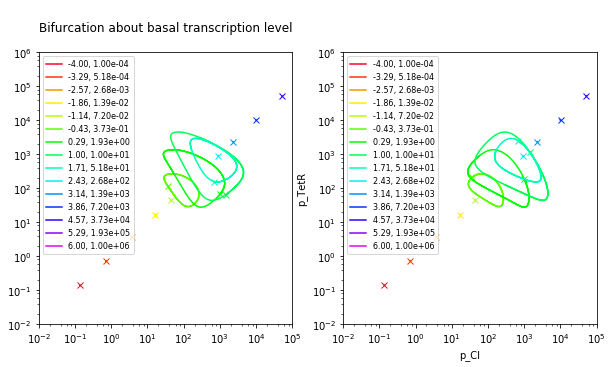

In [83]:
print cmd_default_param



cpnum0=5.;
k_m=0.5/cpnum0;
k_m0=5e-4/cpnum0;

K=40.0
K_TetR=40.0;
n=2.1

k_dm=0.00577622650467
k_dp=0.00144405662617
k_dGFP=0.000128360588993
k_p=0.115524530093
IPTG=0.;
K_IPTG=6.E6;
cpnum = 5;



/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:52: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


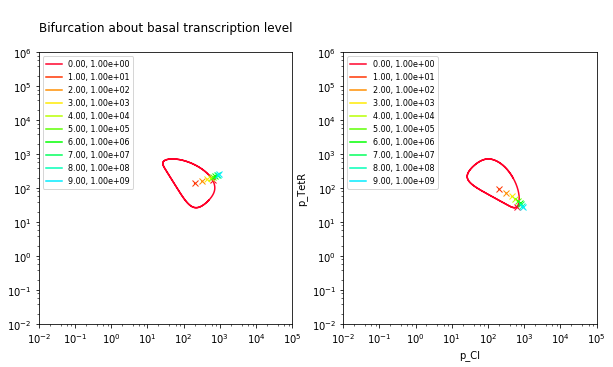

In [84]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
Bifurcation about basal transcription level
'''

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
# varname+=['m_Hypo','p_Hypo'];
# m_Hypo=0;p_Hypo=0;
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
cstname.append('pnum')

exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)


t_max=1000.*60.

lc_step = 10000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;
# lst=np.linspace(-4,6.,siz)
lst=np.arange(0,10,1)
# k_dp=0.0014
for i,log_par in enumerate(lst):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    pnum = [[1,log_par],[1,0],[1,0]]
#     n = log_par
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    

    xs=p_CI_obs;ys=p_LacI_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:52: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


log_par = 0.0, period estimate: 5000.000000
log_par = 0.0, period estimate: 5000.000000
log_par = 0.1, period estimate: 5000.000000
log_par = 0.1, period estimate: 5000.000000
log_par = 0.1, period estimate: 5000.000000
log_par = 0.2, period estimate: 5000.000000
log_par = 0.2, period estimate: 5000.000000
log_par = 0.2, period estimate: 5000.000000
log_par = 0.3, period estimate: 5000.000000
log_par = 0.3, period estimate: 5000.000000


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


log_par = 0.4, period estimate: 0.000000
log_par = 0.4, period estimate: 0.000000
log_par = 0.4, period estimate: 0.000000
log_par = 0.5, period estimate: 0.000000
log_par = 0.5, period estimate: 0.000000


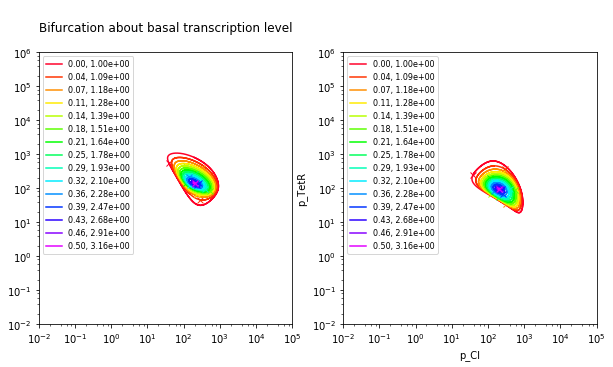

In [85]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
Bifurcation about basal transcription level
'''

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
# varname+=['m_Hypo','p_Hypo'];
# m_Hypo=0;p_Hypo=0;
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
cstname.append('pnum')

exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)


t_max=1000.*60.

lc_step = 10000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;
lst=np.linspace(-0,.5,siz)
# lst=np.arange(0,2,.25)
# k_dp=0.0014
for i,log_par in enumerate(lst):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    pnum = [[2,log_par],[1,0],[1,0]]
#     n = log_par
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    
    print('log_par = {:2.1f}, period estimate: {:f}'.format(log_par,fft_period(p_LacI_obs,debug=0)))
    

    xs=p_CI_obs;ys=p_LacI_obs;

    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    
axL.set_xscale('log')
axL.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:56: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


log_par = 0.5, period estimate: 4000.000000
log_par = 0.6, period estimate: 4000.000000
log_par = 0.6, period estimate: 4000.000000
log_par = 0.7, period estimate: 4000.000000
log_par = 0.8, period estimate: 5000.000000
log_par = 0.8, period estimate: 5000.000000
log_par = 0.9, period estimate: 5000.000000
log_par = 0.9, period estimate: 5000.000000
log_par = 1.0, period estimate: 5000.000000
log_par = 1.1, period estimate: 5000.000000
log_par = 1.1, period estimate: 5000.000000
log_par = 1.2, period estimate: 5000.000000
log_par = 1.3, period estimate: 5000.000000
log_par = 1.3, period estimate: 5000.000000
log_par = 1.4, period estimate: 5000.000000


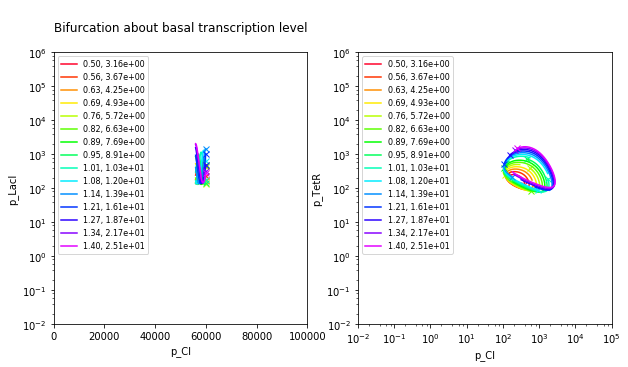

In [86]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
Bifurcation about basal transcription level
'''

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
# varname+=['m_Hypo','p_Hypo'];
# m_Hypo=0;p_Hypo=0;
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
cstname.append('pnum')

exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)


t_max=1000.*60.

lc_step = 20000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz=15;
lst=np.linspace(.5,1.4,siz)
# lst=np.arange(0,10,1)
# k_dp=0.0014
for i,log_par in enumerate(lst):
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    p = 10**log_par
#     pnum = [[log_par,1],[log_par,0],[log_par,0]]
    pnum = [[p,1],[p,0],[p,0]]
    
#     k_dm = 10**log_par
#     n = log_par
    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    
    print('log_par = {:2.1f}, period estimate: {:f}'.format(log_par,fft_period(p_LacI_obs,debug=0)))

    t_obs=t_obs[-4000:]   
    s_obs=s_obs[-4000:,:]
    exec(cmd_unpack_obs)
    
#     xs=p_CI_obs;ys=p_LacI_obs;
    xs=t_obs;ys=p_LacI_obs;
    
    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    
    xs=p_CI_obs;ys=p_TetR_obs;
    
    axR.plot(xs,ys,color=col,label=lbl)
    axR.plot(xs[-1],ys[-1],'x',color=col)
    # axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlabel('p_CI')
axL.set_ylabel('p_LacI')
axL.set_xlim(1E-2,1E5)
axL.set_ylim(1E-2,1E6)
axL.legend(loc=2,prop={'size':8})

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('p_CI')
axR.set_ylabel('p_TetR')
axR.set_xlim(1E-2,1E5)
axR.set_ylim(1E-2,1E6)
axR.legend(loc=2,prop={'size':8})

[0.5, -0.5, 1.3999999999999999, 1.3999999999999999]


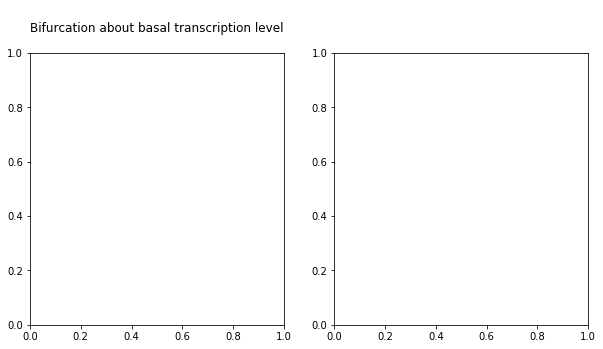

In [87]:
# bifurcation against basal transcription level
# %matplotlib notebook
tl='''
Bifurcation about basal transcription level
'''

fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0
    
exec(cmd_init_name)
# varname+=['m_Hypo','p_Hypo'];
# m_Hypo=0;p_Hypo=0;
exec(cmd_name2dict)
# parname = 'm_LacI'
# varname.pop(vardict[parname])
cstname.append('pnum')

exec(cmd_name2dict)
cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_pack_all=make_pack_cmd(varname,cstname);
cmd_init_all=make_init_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)


t_max=1000.*60.

lc_step = 20000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz1=15;
siz2=15;

xlim=[.5,1.4];
ylim=[-.5,1.4];
extent=list(np.array([xlim,ylim]).T.flat);
print(list(extent))
lst1=np.linspace(xlim[0],xlim[1],siz1)
lst2=np.linspace(ylim[0],ylim[1],siz2)

(xgrids,ygrids)= np.meshgrid(lst1,lst2);
shape=lst1.shape;
# lst=np.arange(0,10,1)
# k_dp=0.0014

In [88]:
t_max=1000.*60.

lc_step = 20000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz1=10;
siz2=10;

xlim=[-2.,2];
ylim=[-4,.5];
extent=list(np.array([xlim,ylim]).T.flat);
print(list(extent))
lst1=np.linspace(xlim[0],xlim[1],siz1)
lst2=np.linspace(ylim[0],ylim[1],siz2)

(xgrids,ygrids)= np.meshgrid(lst1,lst2);
shape=lst1.shape;
enum=enumerate(zip(xgrids.flat,ygrids.flat))
(i,(a1,a2))=enum.next()
# i,a1,a2

[-2.0, -4.0, 2.0, 0.5]


In [89]:

perlst = 0*xgrids;
for i,log_par in enumerate(zip(xgrids.flat,ygrids.flat)):
    log_par1,log_par2=log_par;
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par[0],10**(log_par[0]))

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    pa = 10**log_par1
    pi = 10**log_par2
#     pnum = [[log_par,1],[log_par,0],[log_par,0]]
    pnum = [[pa,pi],[pa,pi],[pa,pi]];

    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    period=fft_period(p_LacI_obs,debug=0);
    perlst.flat[i]=period
    print('log_par = {}, period estimate: {:f}'.format(str(log_par),period))
    

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


log_par = (-2.0, -4.0), period estimate: 0.000000
log_par = (-1.5555555555555556, -4.0), period estimate: 0.000000
log_par = (-1.1111111111111112, -4.0), period estimate: 0.000000
log_par = (-0.66666666666666674, -4.0), period estimate: 0.000000
log_par = (-0.22222222222222232, -4.0), period estimate: 5000.000000
log_par = (0.22222222222222232, -4.0), period estimate: 6666.666667
log_par = (0.66666666666666652, -4.0), period estimate: 6666.666667
log_par = (1.1111111111111107, -4.0), period estimate: 6666.666667
log_par = (1.5555555555555554, -4.0), period estimate: 6666.666667
log_par = (2.0, -4.0), period estimate: 5000.000000
log_par = (-2.0, -3.5), period estimate: 0.000000
log_par = (-1.5555555555555556, -3.5), period estimate: 0.000000
log_par = (-1.1111111111111112, -3.5), period estimate: 0.000000
log_par = (-0.66666666666666674, -3.5), period estimate: 0.000000
log_par = (-0.22222222222222232, -3.5), period estimate: 5000.000000
log_par = (0.22222222222222232, -3.5), period es

In [90]:

#     t_obs=t_obs[-4000:]   
#     s_obs=s_obs[-4000:,:]
#     exec(cmd_unpack_obs)
    
#     xs=t_obs;ys=p_LacI_obs;    
#     axL.plot(xs,ys,color=col,label=lbl)
#     axL.plot(xs[-1],ys[-1],'x',color=col)
    
#     xs=p_CI_obs;ys=p_TetR_obs;    
#     axR.plot(xs,ys,color=col,label=lbl)
#     axR.plot(xs[-1],ys[-1],'x',color=col)

# axL.set_yscale('log')
# axL.set_xlabel('p_CI')
# axL.set_ylabel('p_LacI')
# axL.set_xlim(1E-2,1E5)
# axL.set_ylim(1E-2,1E6)
# axL.legend(loc=2,prop={'size':8})

# axR.set_xscale('log')
# axR.set_yscale('log')
# axR.set_xlabel('p_CI')
# axR.set_ylabel('p_TetR')
# axR.set_xlim(1E-2,1E5)
# axR.set_ylim(1E-2,1E6)
# axR.legend(loc=2,prop={'size':8})

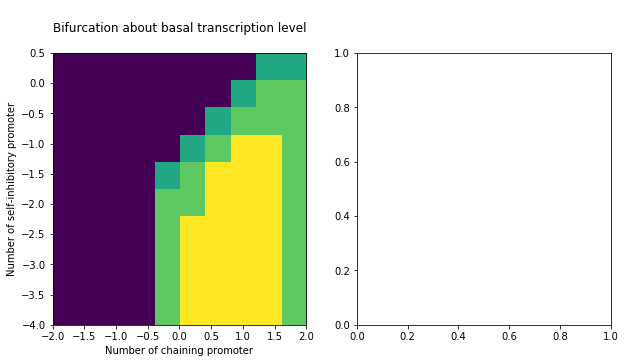

In [91]:
fig1 = plt.figure(figsize=(10,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0

axL.imshow(perlst,extent=xlim+ylim,aspect='auto',origin='lower')
axL.set_xlabel('Number of chaining promoter')
axL.set_ylabel('Number of self-inhibitory promoter')

[-2.0, -4.0, 2.0, 0.5]
0.00 percent 


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


25.00 percent 
50.00 percent 
75.00 percent 


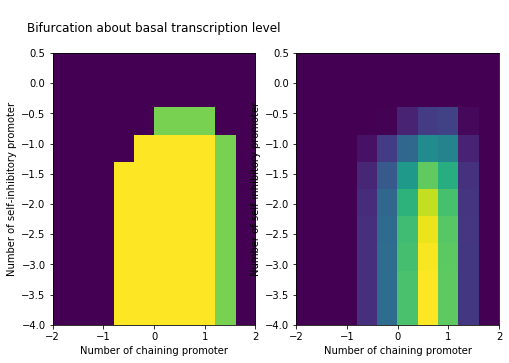

In [92]:
t_max=1000.*60.

lc_step = 20000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz1=10;
siz2=10;

xlim=[-2.,2];
ylim=[-4,.5];
extent=list(np.array([xlim,ylim]).T.flat);
print(list(extent))
lst1=np.linspace(xlim[0],xlim[1],siz1)
lst2=np.linspace(ylim[0],ylim[1],siz2)

(xgrids,ygrids)= np.meshgrid(lst1,lst2);
shape=lst1.shape;
enum=enumerate(zip(xgrids.flat,ygrids.flat))
(i,(a1,a2))=enum.next()
# i,a1,a2
perlst = 0*xgrids;
amplst=0*xgrids;
siz=perlst.size;
for i,log_par in enumerate(zip(xgrids.flat,ygrids.flat)):
    log_par1,log_par2=log_par;
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par[0],10**(log_par[0]))

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    pa = 10**log_par1
    pi = 10**log_par2
#     pnum = [[log_par,1],[log_par,0],[log_par,0]]
    pnum = [[pa,pi],[1,0],[1,0]];

    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    ys=p_LacI_obs;
    period=fft_period(ys,debug=0);
    perlst.flat[i]=period
    amplst.flat[i]=ys.max()-ys.min();
#     print('log_par = {}, period estimate: {:f}'.format(str(log_par),period))
    if  i%(int(siz/4))==0:
        print('{:2.2f} percent '.format(100.*i/siz))

fig1 = plt.figure(figsize=(8,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0

axL.imshow(perlst,extent=xlim+ylim,aspect='auto',origin='lower')
axL.set_xlabel('Number of chaining promoter')
axL.set_ylabel('Number of self-inhibitory promoter')

axR.imshow(amplst,extent=xlim+ylim,aspect='auto',origin='lower')
axR.set_xlabel('Number of chaining promoter')
axR.set_ylabel('Number of self-inhibitory promoter')

[0.5, -0.050000000000000003, 1.3999999999999999, 0.050000000000000003]


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


0.00 percent 
25.00 percent 
50.00 percent 
75.00 percent 


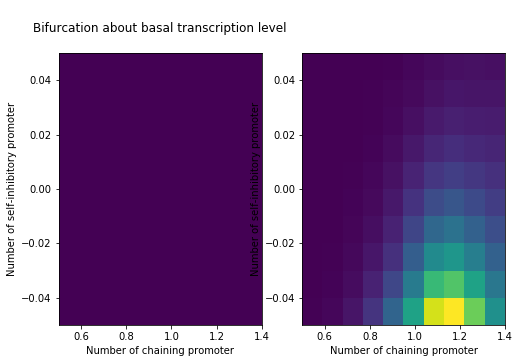

In [93]:
t_max=1000.*60.

lc_step = 20000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz1=10;
siz2=10;

xlim=[.5,1.4];
ylim=[-.05,.05];
extent=list(np.array([xlim,ylim]).T.flat);
print(list(extent))
lst1=np.linspace(xlim[0],xlim[1],siz1)
lst2=np.linspace(ylim[0],ylim[1],siz2)

(xgrids,ygrids)= np.meshgrid(lst1,lst2);
shape=lst1.shape;
enum=enumerate(zip(xgrids.flat,ygrids.flat))
(i,(a1,a2))=enum.next()
# i,a1,a2
perlst = 0*xgrids;
amplst=0*xgrids;
siz=perlst.size;
for i,log_par in enumerate(zip(xgrids.flat,ygrids.flat)):
    log_par1,log_par2=log_par;
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par[0],10**(log_par[0]))

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    pa = 10**log_par1
    pi = 10**log_par2
#     pnum = [[log_par,1],[log_par,0],[log_par,0]]
    pnum = [[pa,pi],[1,0],[1,0]];

    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    ys=p_LacI_obs;
    period=fft_period(ys,debug=0);
    perlst.flat[i]=period
    amplst.flat[i]=ys.max()-ys.min();
#     print('log_par = {}, period estimate: {:f}'.format(str(log_par),period))
    if  i%(int(siz/4))==0:
        print('{:2.2f} percent '.format(100.*i/siz))

fig1 = plt.figure(figsize=(8,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0

axL.imshow(perlst,extent=xlim+ylim,aspect='auto',origin='lower')
axL.set_xlabel('Number of chaining promoter')
axL.set_ylabel('Number of self-inhibitory promoter')

axR.imshow(amplst,extent=xlim+ylim,aspect='auto',origin='lower')
axR.set_xlabel('Number of chaining promoter')
axR.set_ylabel('Number of self-inhibitory promoter')

[0.5, -0.5, 1.3999999999999999, 0.5]


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


0.00 percent 
25.00 percent 


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


50.00 percent 
75.00 percent 


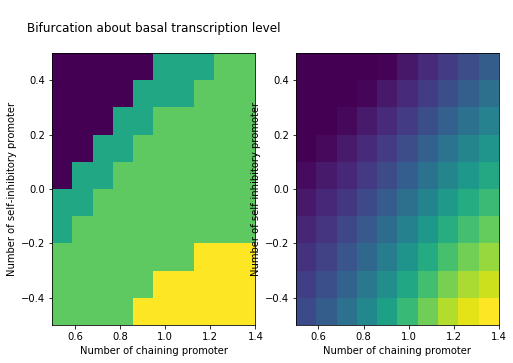

In [94]:
t_max=1000.*60.

lc_step = 20000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz1=10;
siz2=10;

xlim=[.5,1.4];
ylim=[-.5,.5];
extent=list(np.array([xlim,ylim]).T.flat);
print(list(extent))
lst1=np.linspace(xlim[0],xlim[1],siz1)
lst2=np.linspace(ylim[0],ylim[1],siz2)

(xgrids,ygrids)= np.meshgrid(lst1,lst2);
shape=lst1.shape;
enum=enumerate(zip(xgrids.flat,ygrids.flat))
(i,(a1,a2))=enum.next()
# i,a1,a2
perlst = 0*xgrids;
amplst=0*xgrids;
siz=perlst.size;
for i,log_par in enumerate(zip(xgrids.flat,ygrids.flat)):
    log_par1,log_par2=log_par;
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par[0],10**(log_par[0]))

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    pa = 10**log_par1
    pi = 10**log_par2
#     pnum = [[log_par,1],[log_par,0],[log_par,0]]
    pnum = [[pa,pi],[pa,0],[pa,0]];

    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    ys=p_LacI_obs;
    period=fft_period(ys,debug=0);
    perlst.flat[i]=period
    amplst.flat[i]=ys.max()-ys.min();
#     print('log_par = {}, period estimate: {:f}'.format(str(log_par),period))
    if  i%(int(siz/4))==0:
        print('{:2.2f} percent '.format(100.*i/siz))

fig1 = plt.figure(figsize=(8,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0

axL.imshow(perlst,extent=xlim+ylim,aspect='auto',origin='lower')
axL.set_xlabel('Number of chaining promoter')
axL.set_ylabel('Number of self-inhibitory promoter')

axR.imshow(amplst,extent=xlim+ylim,aspect='auto',origin='lower')
axR.set_xlabel('Number of chaining promoter')
axR.set_ylabel('Number of self-inhibitory promoter')

[-2.0, -4.0, 2.0, 0.5]
0.00 percent 


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:42: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: divide by zero encountered in divide


24.89 percent 
49.78 percent 
74.67 percent 
99.56 percent 


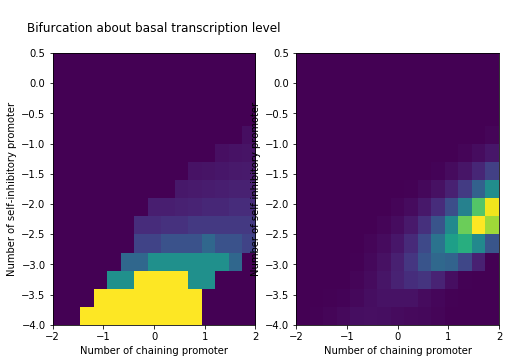

In [95]:
t_max=1000.*60.

lc_step = 20000;
# lc_step = int(t_max)

cm = plt.get_cmap('gist_rainbow')

siz1=15;
siz2=15;

xlim=[-2.,2];
ylim=[-4,.5];
extent=list(np.array([xlim,ylim]).T.flat);
print(list(extent))
lst1=np.linspace(xlim[0],xlim[1],siz1)
lst2=np.linspace(ylim[0],ylim[1],siz2)

(xgrids,ygrids)= np.meshgrid(lst1,lst2);
shape=lst1.shape;
enum=enumerate(zip(xgrids.flat,ygrids.flat))
(i,(a1,a2))=enum.next()
# i,a1,a2
perlst = 0*xgrids;
amplst=0*xgrids;
siz=perlst.size;
for i,log_par in enumerate(zip(xgrids.flat,ygrids.flat)):
    log_par1,log_par2=log_par;
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par[0],10**(log_par[0]))

    exec(cmd_default_param)
    exec(cmd_default_incond)
#     pnum = [10**(log_par)]*3
    pa = 10**log_par1
#     pi = 10**log_par2
    k_dp = 10**log_par2
#     pnum = [[log_par,1],[log_par,0],[log_par,0]]
    pnum = [[pa,0],[pa,0],[pa,0]];

    exec(cmd_init_all)
    t_max=1000.*60.
    t_obs=np.linspace(0,t_max,t_max+1)
    s_obs=odeint(sdot_mtpl,s0,t_obs,args=(param,))
    
    t_obs=t_obs[-lc_step:]   
    s_obs=s_obs[-lc_step:,:]
    exec(cmd_unpack_obs)
    ys=p_LacI_obs;
    period=fft_period(ys,debug=0);
    perlst.flat[i]=period
    amplst.flat[i]=ys.max()-ys.min();
#     print('log_par = {}, period estimate: {:f}'.format(str(log_par),period))
    if  i%(int(siz/4))==0:
        print('{:2.2f} percent '.format(100.*i/siz))

fig1 = plt.figure(figsize=(8,5))
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
axL.set_title(tl);
IPTG_method=None;
IPTG=0

axL.imshow(perlst,extent=xlim+ylim,aspect='auto',origin='lower')
axL.set_xlabel('Number of chaining promoter')
axL.set_ylabel('Number of self-inhibitory promoter')

axR.imshow(amplst,extent=xlim+ylim,aspect='auto',origin='lower')
axR.set_xlabel('Number of chaining promoter')
axR.set_ylabel('Number of self-inhibitory promoter')